In [1]:
import numpy as np
import os
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from mpl_toolkits.axes_grid1 import make_axes_locatable

plt.rcParams.update({'font.size': 22})
plt.rcParams["text.usetex"] = False
plt.rcParams["font.family"] = "sans-serif"

In [2]:
def Read_Two_Column_File(file_name):
    with open(file_name, 'r') as data:
        x = []
        y = []
        for line in data:
            p = line.split()
            x.append(float(p[0]))
            y.append(float(p[1]))

    return x, y

class alchemical_data:
    
    def __init__(self, path, corrections, time, sim_type, dihe_corr):
    #es_times, es_energies = Read_Two_Column_File('/Users/bdneff/100ns_sims/GAFF/LYS/10mm/many_lambdas/1ns-equil_charge1.txt')
    #lj_times, lj_energies = Read_Two_Column_File('/Users/bdneff/100ns_sims/GAFF/10mm_CL/10ns-equil_lj1.txt')
    #cl_times, cl_energies = Read_Two_Column_File('/Users/bdneff/100ns_sims/GAFF/10mm_CL/10ns-equil_CL1.txt')
        #self.free_energies = None
        self.dihe_corr = dihe_corr
        self.time = time
        self.sim_type = sim_type 
        nFiles = 4 #always assumes 4 replicas
        nFields = 2
        data = np.zeros((nFiles,nFields))
        dataList = []
        
        
        #assumes all data is same length
        for i in range(1,nFiles+1):
            self.es_times, self.es_energies = Read_Two_Column_File(f'{path}/{time}ns-equil_charge{i}.txt')
            self.lj_times, self.lj_energies = Read_Two_Column_File(f'{path}/{time}ns-equil_lj{i}.txt')
            self.cl_times, self.cl_energies = Read_Two_Column_File(f'{path}/{time}ns-equil_CL{i}.txt')

       
        #if self.time == 1:
            #es_times, es_energies = Read_Two_Column_File('/Users/bdneff/100ns_sims/GAFF/LYS/10mm/many_lambdas/1ns-equil_charge1.txt')
        #if self.time == 2:
        #    es_times, es_energies = Read_Two_Column_File('/Users/bdneff/100ns_sims/GAFF/LYS/10mm/opt_lambdas_run2/2ns-equil_lj1.txt')
        #if self.time == 5:
            #es_times, es_energies = Read_Two_Column_File('/Users/bdneff/100ns_sims/GAFF/10mm_CL/5ns-equil_charge1.txt')
        #if self.time == 10:
            #es_times, es_energies = Read_Two_Column_File('/Users/bdneff/100ns_sims/GAFF/10mm_CL/10ns-equil_charge1.txt')
            
        
        if self.sim_type == 'CL':
            for i in range(1,nFiles+1):
                self.es_times, self.es_energies = Read_Two_Column_File(f'{path}/{time}ns-equil_charge{i}.txt')
                self.lj_times, self.lj_energies = Read_Two_Column_File(f'{path}/{time}ns-equil_lj{i}.txt')
                self.cl_times, self.cl_energies = Read_Two_Column_File(f'{path}/{time}ns-equil_CL{i}.txt')

                tmp = [self.es_energies, self.lj_energies, self.cl_energies]

                dataList.append(tmp)

            self.free_energies = []
            for i, ele in enumerate(dataList):
                tmp = np.add(ele[0],ele[1])
                tmp2 = np.add(tmp, corrections[i])
                fe_eng = np.subtract(tmp2, ele[2])
                self.free_energies.append(-1 * fe_eng)
                
        if self.sim_type == 'none':
            nFiles = 4
            nFields = 2
            data = np.zeros((nFiles,nFields))
            dataList = []

            for i in range(1,nFiles+1):
                self.es_times, self.es_energies = Read_Two_Column_File(f'{path}/{time}ns-equil_charge{i}.txt')
                self.lj_times, self.lj_energies = Read_Two_Column_File(f'{path}/{time}ns-equil_lj{i}.txt')
                tmp = [self.es_energies, self.lj_energies]

                dataList.append(tmp)


            self.free_energies = []
            for i, ele in enumerate(dataList):
                #print(ele[0])
                #print(ele[1])
                tmp = np.add(ele[0],ele[1])
                self.free_energies.append(-1 * tmp)
                
        if self.sim_type == 'dihe':
            nFiles = 4
            nFields = 2
            data = np.zeros((nFiles,nFields))
            dataList = []

            for i in range(1,nFiles+1):
                self.es_times, self.es_energies = Read_Two_Column_File(f'{path}/{time}ns-equil_charge{i}.txt')
                self.lj_times, self.lj_energies = Read_Two_Column_File(f'{path}/{time}ns-equil_lj{i}.txt')
                tmp = [self.es_energies, self.lj_energies]
                tmp_dihe = dihe_corr[i-1]
                dataList.append(tmp)
            
            self.free_energies = []
            for i, ele in enumerate(dataList):
                tmp = np.add(ele[0],ele[1])
                self.free_energies.append(-1 * tmp - dihe_corr[i])
        
        if self.sim_type == 'ALL':
            for i in range(1,nFiles+1):
                self.es_times, self.es_energies = Read_Two_Column_File(f'{path}/{time}ns-equil_charge{i}.txt')
                self.lj_times, self.lj_energies = Read_Two_Column_File(f'{path}/{time}ns-equil_lj{i}.txt')
                self.cl_times, self.cl_energies = Read_Two_Column_File(f'{path}/{time}ns-equil_CL{i}.txt')
                self.corrections = corrections
                tmp_dihe = dihe_corr[i-1]
                tmp = [self.es_energies, self.lj_energies, self.cl_energies]

                dataList.append(tmp)
                
            self.free_energies = []
            self.ljs = []
            self.cls = []
            self.ess = []
            for i, ele in enumerate(dataList):
                #tmp = np.add(ele[0],ele[1])
                #tmp2 = np.add(tmp, corrections[i])
                #fe_eng = np.subtract(tmp2, ele[2])
                #self.free_energies.append(-1 * fe_eng - dihe_corr)
                self.ess.append(ele[0])
                self.ljs.append(ele[1])
                self.cls.append(ele[2])
                
                tmp = np.add(ele[0][-1],ele[1][-1])
                tmp2 = np.add(tmp, corrections[i])
                fe_eng = np.subtract(tmp2, ele[2][-1])
                #self.free_energies.append(-1 * fe_eng - dihe_corr)
                if len(ele[0]) == len(ele[1]):
                    tmp = np.add(ele[0],ele[1])
                    tmp2 = np.add(tmp, corrections[i])
                    fe_eng = np.subtract(tmp2, ele[2])
                    self.free_energies.append(-1 * fe_eng - dihe_corr[i])
                
                else:
                    print("cannot calculate free energy convergence for steps of different length")
    
    def get_FEs(self):
        print("free energy predicitions using max time for each step:")
        print(self.free_energies)

    

    def plot_all(self):
        #plt.title(f'Predicted binding free energy from {self.sim_type}')
        plt.xlabel('times (ns)')
        plt.ylabel('∆G (kJ/mol)')
        plt.ylim(-60, -10)
        for ele in self.free_energies:
            plt.plot(np.divide(self.lj_times,1000), ele, color = '#0000FF', alpha = 0.3)
        #plt.savefig(f'/Users/bdneff/Desktop/{self.time}ns_{self.sim_type}_all')


    def plot_average(self, ori_color = 'blue', windows = 'set_windows'):
        for ele in self.free_energies:
            #print(ele)
            plt.plot(np.divide(self.lj_times,1000)[:-1] , ele[1:], color = ori_color, alpha = 0.2)
        #plt.title(f'Predicted binding free energy from {self.sim_type}')
        plt.xlabel('times (ns)')
        plt.ylabel('∆G (kJ/mol)')
        #plt.ylim(-60, -10)
        #print(self.free_energies)
        ys = np.mean(self.free_energies, axis=0)
        print(ys[-1])
        stds = np.std(self.free_energies,axis=0)
        plt.errorbar(np.divide(self.lj_times,1000)[:-1],ys[1:],stds[1:], label = str('average prediction ' + str(windows)),color = ori_color, capsize = 10)
        #print(stds)
        #plt.plot(self.es_times,ys)
        #plt.savefig(f'/Users/bdneff/Desktop/{self.time}ns_{self.sim_type}_average')
    #print(free_energies)
    
    def plot_lj(self, ori_color = 'blue', windows = 'set_windows'):
        for ele in self.ljs:
            plt.plot(np.divide(self.lj_times,1000) , ele, color = ori_color, alpha = 0.2)
        plt.xlabel('time (ns)')
        plt.ylabel('∆G (kJ/mol)')
        plt.ylim(0, 50)
        #print(self.ljs)
        #print(self.lj_times)
        ys = np.mean(self.ljs, axis=0)
        stds = np.std(self.ljs,axis=0)
        plt.errorbar(np.divide(self.lj_times,1000),ys,stds, label = str(str(windows) + ' steps'), color=ori_color)
        plt.plot(np.divide(self.es_times,1000),stds, color = ori_color)
        #print(stds)
        
    def plot_CL(self, ori_color='blue', windows = 'set_windows'):
        for ele in self.cls:
            plt.plot(np.divide(self.cl_times,1000), ele, color = ori_color, alpha = 0.2)
        plt.xlabel('time (ns)')
        plt.ylabel('∆G (kJ/mol)')
        plt.ylim(-50, 0)
        #print(self.free_energies)
        ys = np.mean(self.cls, axis=0)
        stds = np.std(self.cls,axis=0)
        plt.errorbar(np.divide(self.cl_times,1000),ys, stds, color = ori_color, label = str(str(windows) + ' steps'))
        plt.plot(np.divide(self.es_times,1000),stds, color = ori_color)
        #print(stds)
        
    def plot_es(self, ori_color='blue', windows = 'set_windows'):
        for ele in self.ess:
            plt.plot(np.divide(self.es_times,1000), ele, color = ori_color, alpha = 0.2)
        plt.xlabel('time (ns)')
        plt.ylabel('∆G (kJ/mol)')
        plt.ylim(0, 50)
        #print(self.free_energies)
        ys = np.mean(self.ess, axis=0)
        stds = np.std(self.ess,axis=0)
        plt.errorbar(np.divide(self.es_times,1000),ys, stds, color = ori_color, label = str(str(windows) + ' steps' ))
        plt.plot(np.divide(self.es_times,1000),stds, color = ori_color)
        #print(stds)
        

In [3]:
#no restraints
no_restsLYS200 = alchemical_data('../data/FE_Results/DRG+LYS/twenty/no_rests',[0,0,0,0], '1', 'ALL',[0,0,0,0])
no_restsLYS10 = alchemical_data('../data/FE_Results/DRG+LYS/ten/no_rests',[0,0,0,0], '1', 'ALL',[0,0,0,0])
no_restsARG200 = alchemical_data('../data/FE_Results/DRG+ARG/twenty/no_rests',[0,0,0,0], '1', 'ALL',[0,0,0,0])
no_restsARG10 = alchemical_data('../data/FE_Results/DRG+ARG/ten/no_rests',[0,0,0,0], '1', 'ALL',[0,0,0,0])

#only orientational restraints
no_diheLYS10 = alchemical_data('../data/FE_Results/DRG+LYS/ten/no_dihe',[-29.0045, -29.0045, -29.0045, -29.0045], '1', 'ALL', [0,0,0,0])
no_dihe_LYS200 = alchemical_data('../data/FE_Results/DRG+LYS/twenty/no_dihe',[-29.8364, -29.8364, -29.8364, -29.8364], '1', 'ALL', [0,0,0,0])
no_diheARG200 = alchemical_data('../data/FE_Results/DRG+ARG/twenty/no_dihe',[-30.5379, -30.5379, -30.5379, -30.5379], '1', 'ALL',[0,0,0,0])
no_diheARG10 = alchemical_data('../data/FE_Results/DRG+ARG/ten/no_dihe',[-30.5236, -30.5236, -30.5236, -30.5236], '1', 'ALL',[0,0,0,0])

#def_protocols
DRG_LYS_10mM = alchemical_data('../data/FE_Results/DRG+LYS/ten/def_protocol',[-29.0045, -29.0045, -29.0045, -29.0045], '1', 'ALL', [3.974402512319225, 4.425310840979413, 3.7633933812894935, 4.3005468946200605])
DRG_LYS_200mM = alchemical_data('../data/FE_Results/DRG+LYS/twenty',[-29.8364, -29.8364, -29.8364, -29.8364], '1', 'ALL',[3.8960583670449327, 4.567838179168744, 3.599721993966759, 2.889830739317668])
DRG_ARG_10mM = alchemical_data('../data/FE_Results/DRG+ARG/ten',[-30.5236, -30.5236, -30.5236, -30.5236], '1', 'ALL', [1.1963061036499163, 1.1859748197739137, 0.8134746475839688, 0.757318376865624])
DRG_ARG_200mM = alchemical_data('../data/FE_Results/DRG+ARG/twenty',[-30.5379, -30.5379, -30.5379, -30.5379], '1', 'ALL',[1.5056585410942844, 1.2610695009308008, 1.2204398477167515, 1.6308665258664257])



-31.65
-32.81
-35.58500000000001
-36.5475


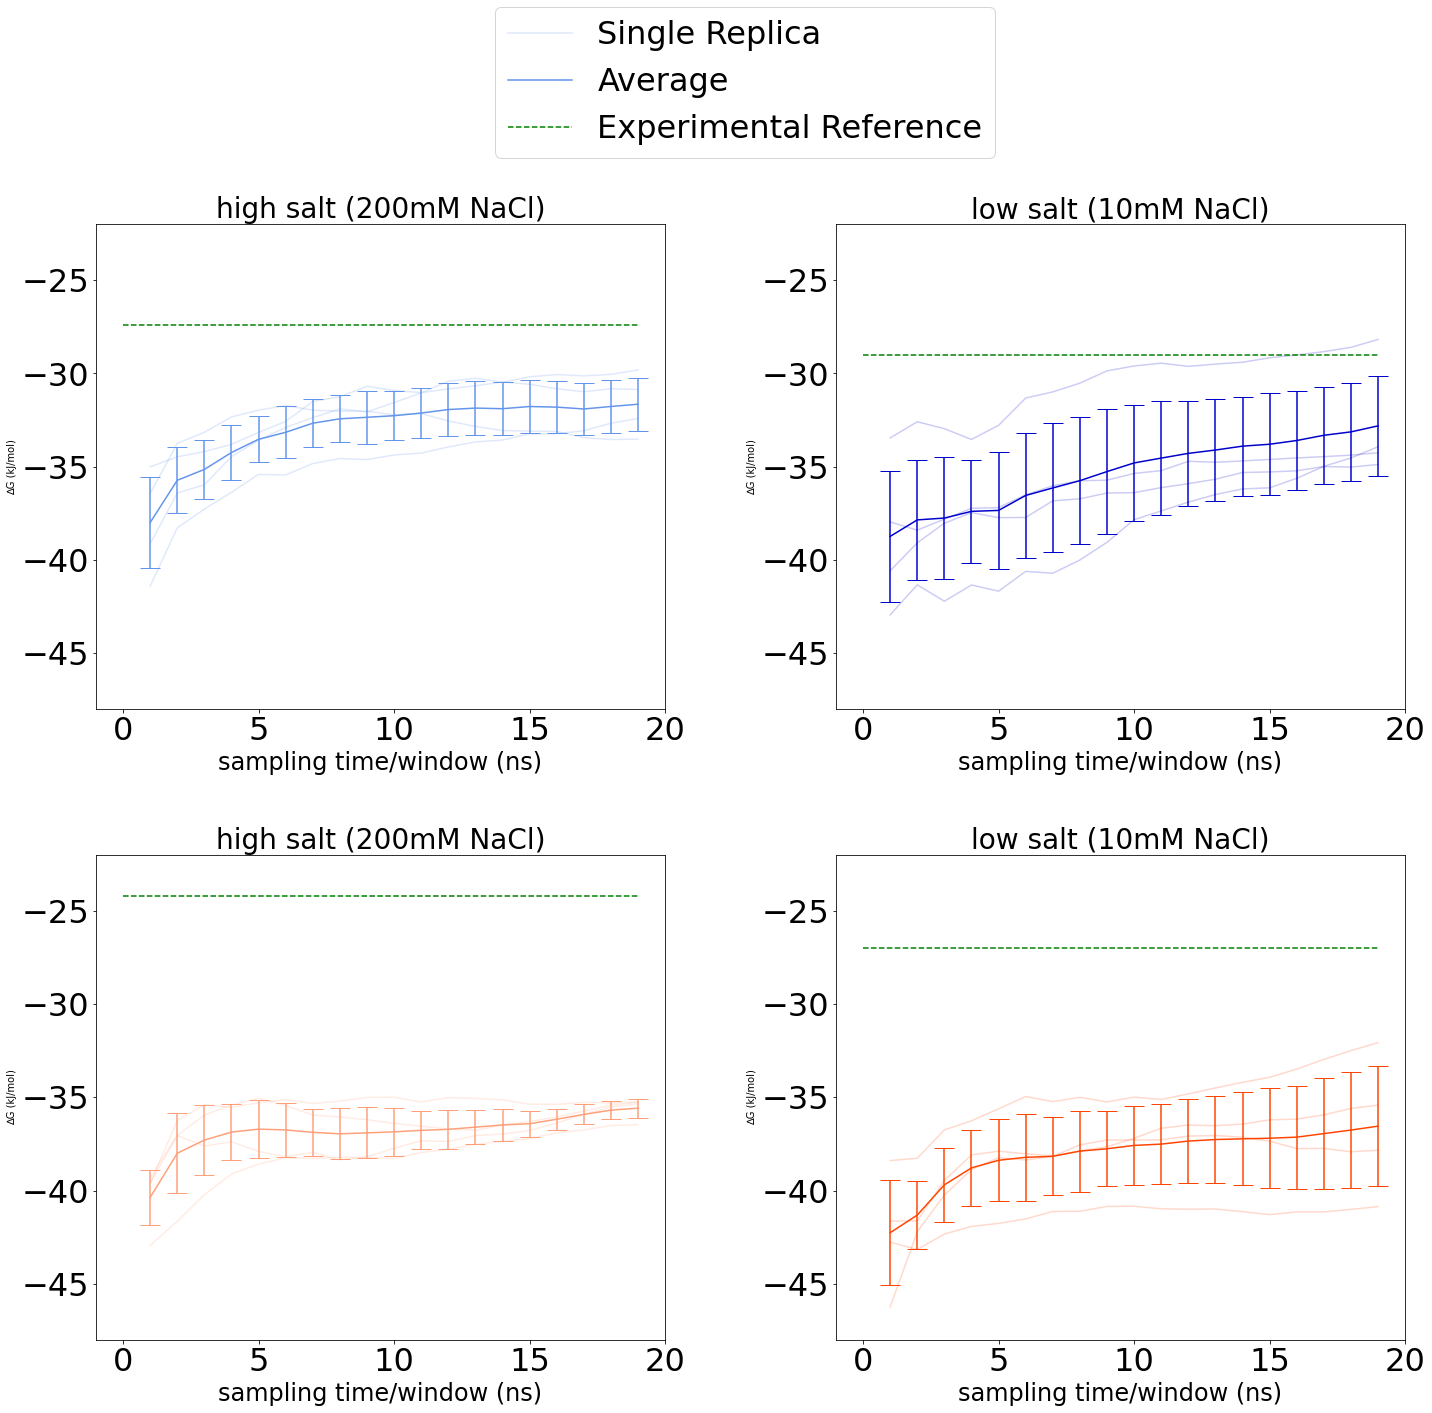

In [4]:

# Create the subplots
fig, axes = plt.subplots(2, 2, figsize=(20, 18))

# Improved color palette for different plots

# Data preparation
exp_values = [-27.4, -29.0, -24.2, -27.0]
titles = ["high salt (200mM NaCl)", "low salt (10mM NaCl)", "high salt (200mM NaCl)", "low salt (10mM NaCl)"]
plot_functions = [no_restsLYS200.plot_average, no_restsLYS10.plot_average,
                  no_restsARG200.plot_average, no_restsARG10.plot_average]

colors = ['cornflowerblue', 'mediumblue', 'lightsalmon', 'orangered']
for ax, exp_val, title, plot_func, color in zip(axes.flatten(), exp_values, titles, plot_functions, colors):
    plt.sca(ax)
    exp20 = [exp_val] * 20
    plot_func(color, 'opt')  # Plot with the specified color
    plt.plot(exp20, color='green', linestyle='--')  # Dashed line for experimental values
    plt.ylim(-48, -22)
    plt.xlim(-1,20)
    plt.title(title, fontsize=28)
    #plt.ylabel('Binding Free Energy (kJ/mol)', fontsize=20)
    plt.xlabel('sampling time/window (ns)', fontsize=24)
    ax.tick_params(axis='both', which='major', labelsize=32)
    #ax.grid(True, linestyle='--', alpha=0.5)  # Adding gridlines
    
# Create custom handles for the legend
ind_lines = mlines.Line2D([], [], color=colors[0], linestyle='-', label='Single Replica',alpha = 0.2 )
custom_lines = mlines.Line2D([], [], color=colors[0], linestyle='-', label='Average')
green_line = mlines.Line2D([], [], color='green', linestyle='--', label='Experimental Reference')

# Add the legend to the figure
fig.legend(handles=[ind_lines, custom_lines,green_line], loc='upper center', bbox_to_anchor=(0.52, 1.1), ncol=1, fontsize=32)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust the rect parameter as needed
plt.subplots_adjust(wspace=0.3, hspace=0.3)  # Adjust the spacing between subplots

plt.savefig('FEP_results_no_rests.png', bbox_inches='tight', dpi = 250)  # Ensure everything is included in the saved figure

plt.show()

-23.521099999999997
-25.750500000000002
-27.0171
-29.801399999999997


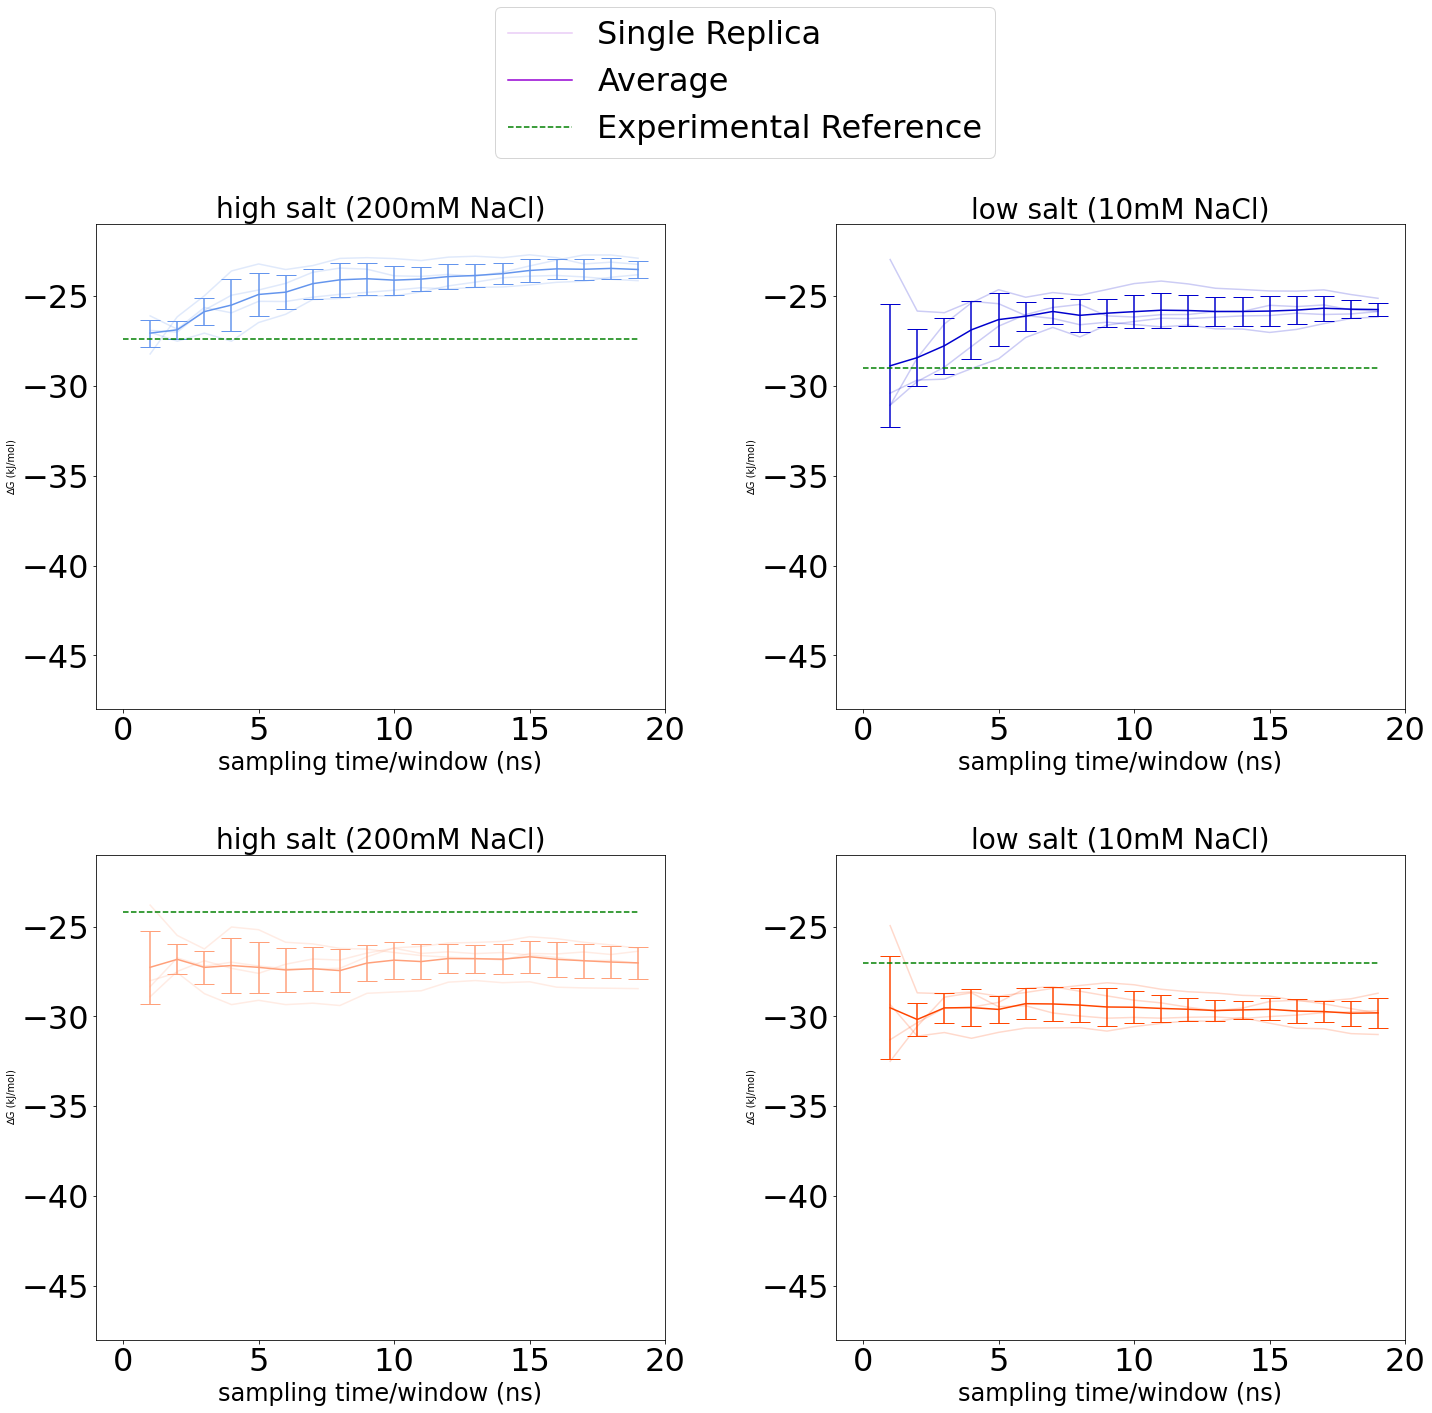

In [5]:


# Create the subplots
fig, axes = plt.subplots(2, 2, figsize=(20, 18))

# Improved color palette for different plots
colors = ['steelblue', 'darkorange', 'seagreen', 'firebrick']

# Data preparation
exp_values = [-27.4, -29.0, -24.2, -27.0]
titles = ["high salt (200mM NaCl)", "low salt (10mM NaCl)", "high salt (200mM NaCl)", "low salt (10mM NaCl)"]
plot_functions = [no_dihe_LYS200.plot_average, no_diheLYS10.plot_average,
                  no_diheARG200.plot_average, no_diheARG10.plot_average]


colors = ['cornflowerblue', 'mediumblue', 'lightsalmon', 'orangered']
for ax, exp_val, title, plot_func, color in zip(axes.flatten(), exp_values, titles, plot_functions, colors):
    plt.sca(ax)
    exp20 = [exp_val] * 20
    plot_func(color, 'opt')  # Plot with the specified color
    plt.plot(exp20, color='green', linestyle='--')  # Dashed line for experimental values
    plt.ylim(-48, -21)
    plt.title(title, fontsize=28)
    #plt.ylabel('Binding Free Energy (kJ/mol)', fontsize=20)
    plt.xlabel('sampling time/window (ns)', fontsize=24)
    plt.xlim(-1,20)
    ax.tick_params(axis='both', which='major', labelsize=32)
    #ax.grid(True, linestyle='--', alpha=0.5)  # Adding gridlines

# Create custom handles for the legend
ind_lines = mlines.Line2D([], [], color='darkviolet', linestyle='-', label='Single Replica',alpha = 0.2 )
custom_lines = mlines.Line2D([], [], color='darkviolet', linestyle='-', label='Average')
green_line = mlines.Line2D([], [], color='green', linestyle='--', label='Experimental Reference')

# Add the legend to the figure
fig.legend(handles=[ind_lines, custom_lines,green_line], loc='upper center', bbox_to_anchor=(0.52, 1.1), ncol=1, fontsize=32)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust the rect parameter as needed
plt.subplots_adjust(wspace=0.3, hspace=0.3)  # Adjust the spacing between subplots

plt.savefig('FEP_results_only_o_rests.png', bbox_inches='tight', dpi = 250)  # Ensure everything is included in the saved figure

plt.show()

-24.281962319874523
-26.31891340730205
-27.31160860390207
-29.18466848696836


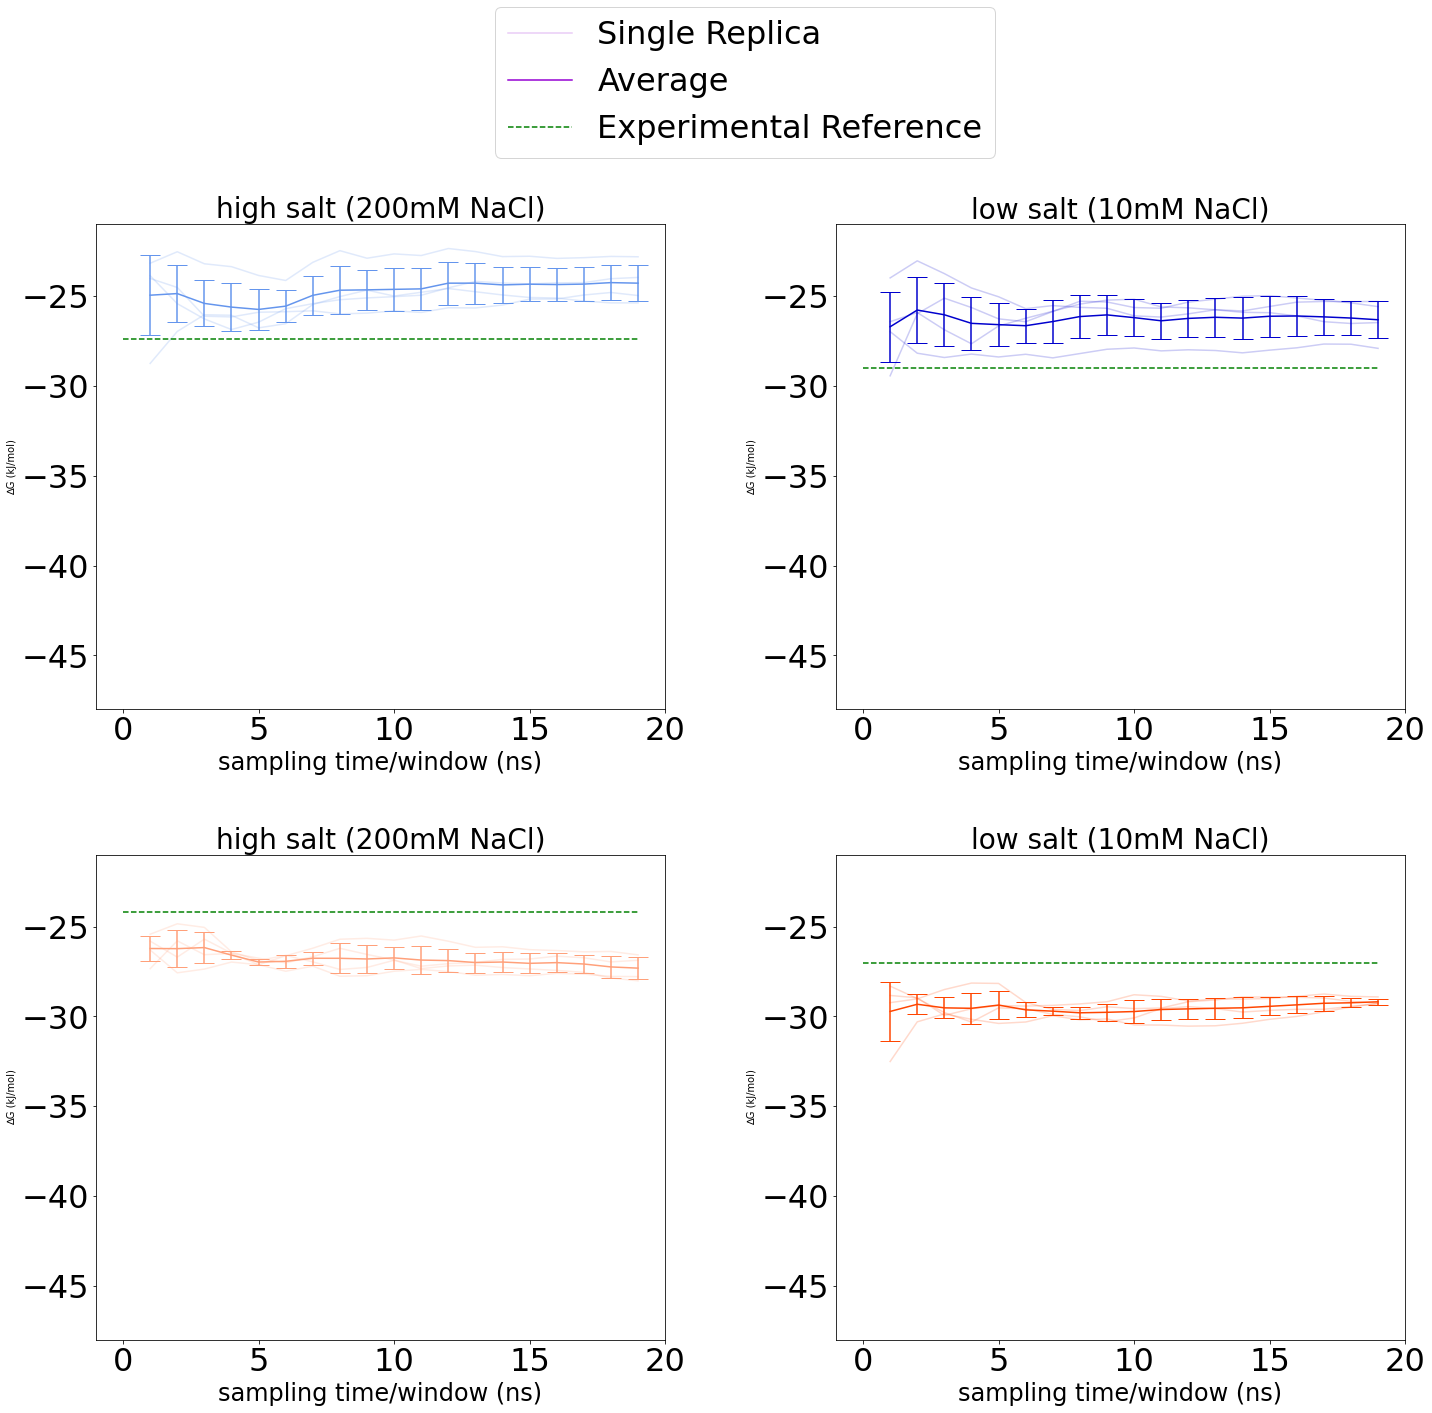

In [6]:

# Create the subplots
fig, axes = plt.subplots(2, 2, figsize=(20, 18))

# Improved color palette for different plots
colors = ['steelblue', 'darkorange', 'seagreen', 'firebrick']

# Data preparation
exp_values = [-27.4, -29.0, -24.2, -27.0]
titles = ["high salt (200mM NaCl)", "low salt (10mM NaCl)", "high salt (200mM NaCl)", "low salt (10mM NaCl)"]
plot_functions = [DRG_LYS_200mM.plot_average, DRG_LYS_10mM.plot_average,
                  DRG_ARG_200mM.plot_average, DRG_ARG_10mM.plot_average]



colors = ['cornflowerblue', 'mediumblue', 'lightsalmon', 'orangered']
for ax, exp_val, title, plot_func, color in zip(axes.flatten(), exp_values, titles, plot_functions, colors):
    plt.sca(ax)
    exp20 = [exp_val] * 20
    plot_func(color, 'opt')  # Plot with the specified color
    plt.plot(exp20, color='green', linestyle='--')  # Dashed line for experimental values
    plt.ylim(-48, -21)
    plt.title(title, fontsize=28)
    #plt.ylabel('Binding Free Energy (kJ/mol)', fontsize=20)
    plt.xlabel('sampling time/window (ns)', fontsize=24)
    plt.xlim(-1,20)
    ax.tick_params(axis='both', which='major', labelsize=32)
    #ax.grid(True, linestyle='--', alpha=0.5)  # Adding gridlines

# Create custom handles for the legend
ind_lines = mlines.Line2D([], [], color='darkviolet', linestyle='-', label='Single Replica',alpha = 0.2 )
custom_lines = mlines.Line2D([], [], color='darkviolet', linestyle='-', label='Average')
green_line = mlines.Line2D([], [], color='green', linestyle='--', label='Experimental Reference')

# Add the legend to the figure
fig.legend(handles=[ind_lines, custom_lines,green_line], loc='upper center', bbox_to_anchor=(0.52, 1.1), ncol=1, fontsize=32)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust the rect parameter as needed
plt.subplots_adjust(wspace=0.3, hspace=0.3)  # Adjust the spacing between subplots

plt.savefig('FEP_results_all_rests', bbox_inches='tight', dpi = 250)  # Ensure everything is included in the saved figure

plt.show()